In [172]:
import numpy as np
import matplotlib.pyplot as plt


In [173]:
from sklearn import datasets

In [174]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target


In [175]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [176]:
# SVM
from sklearn.svm import SVC

In [177]:
# Model 1
model = SVC()

###### Lets split the data in training and testing

In [178]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Later you can re-run and with different combinations of test_size from 0.1 to 0.3 and random_state
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=3)

In [179]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [180]:
### now lets see how well our model did
from sklearn import metrics

In [181]:
predicted = model.predict(X_test)
expected = Y_test


In [182]:
print(metrics.accuracy_score(expected, predicted))

0.9473684210526315


In [183]:
# looking above it looks we have got accuracy , let's take a look at other SVM models, 
# we will look in 4 models. 2 Linear models, a Gaussian Radial Basis Function,and a SVC
# with polynomial (3rd Degree) kernel...........

In [184]:
from sklearn import svm

# we will use all the data and not bother with a split between training and testing data.
X = iris.data[:,:2]  # lets consider only two columns(0 and 1)
Y = iris.target

# SVM regularization parameter
C = 1.0  # explain this

# possible kernel values: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
# SVC with a linear Kernel (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Basis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

# SVC with 3rd degree polynomial, degree param used only by kernel 'poly' and ignored by other.
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [185]:
h = 0.02  # step size

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [186]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [187]:
titles =['SVC with linear Kernel',
       'LinearSVC(Linear kernel)',
        'SVC with RBF kernel',
       'SVC with polynomial(degree 3) kernel']

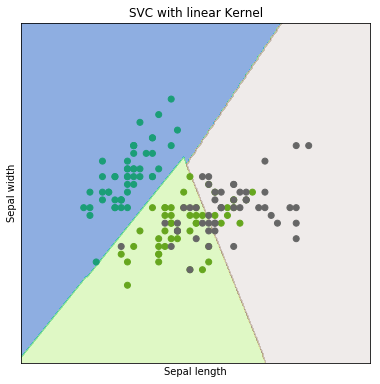

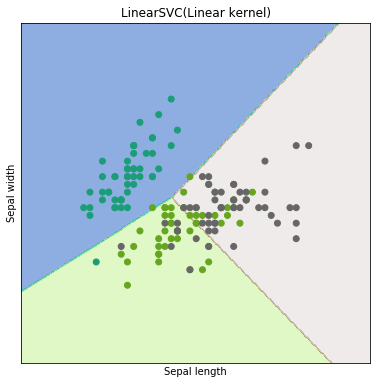

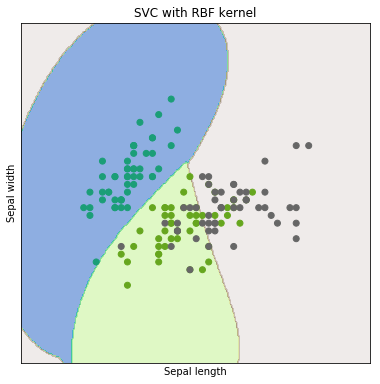

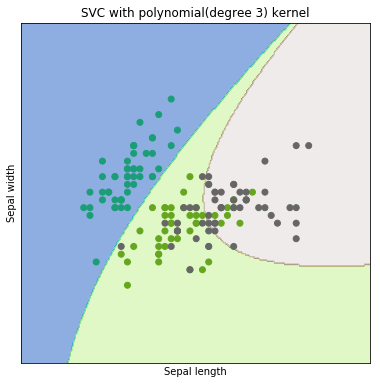

In [188]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z =  Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])